## Загрузка библиотек

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [3]:
plt.rcParams["figure.figsize"] = [20, 10]

In [4]:
sns.set()

## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [5]:
def read_covid_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    df = pd.read_csv(path_to_csv)
    return list(df.values), None


def read_hr_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    df = pd.read_csv(path_to_csv)
    y = df.pop("target")
    return list(df.values), y.values

In [6]:
COVID_DATA_PATH = "./hw_EDA_data/covid.csv"
HR_DATA_PATH = "./hw_EDA_data/hr.csv"

In [7]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

In [8]:
assert len(X_hr) == len(y_hr)

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

In [9]:
df_hr = pd.read_csv(HR_DATA_PATH)
hr_y = df_hr.pop("target")

#### 1. (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

In [10]:
# посмотрим на non-null
df_hr.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


In [11]:
hr_column_types = {
    "numerical": ["training_hours", "city_development_index"],
    "categorical": [
        "city",
        "gender",
        "relevent_experience",
        "enrolled_university",
        "major_discipline",
        "company_type",
    ],
    "ordinal": ["education_level", "experience", "company_size", "last_new_job"],
}

In [12]:
def describe_hr(df, hr_column_types):
    center_n = 30
    print(f"NUMERICAL FEATURES:".center(center_n), "\n")

    f, axes = plt.subplots(1, 2)
    axes = iter(axes)
    for col in hr_column_types["numerical"]:
        sns.histplot(df_hr[col], ax=axes.__next__(), bins=70)
    plt.show()
    # categorical
    for col_type in ["categorical", "ordinal"]:
        print(f"{col_type.upper()} FEATURES:".center(center_n), "\n")
        for col in hr_column_types[col_type]:
            print(col.center(center_n, "-"), "\n")
            print(df_hr[col].value_counts(dropna=False))
            print("\n")

     NUMERICAL FEATURES:       



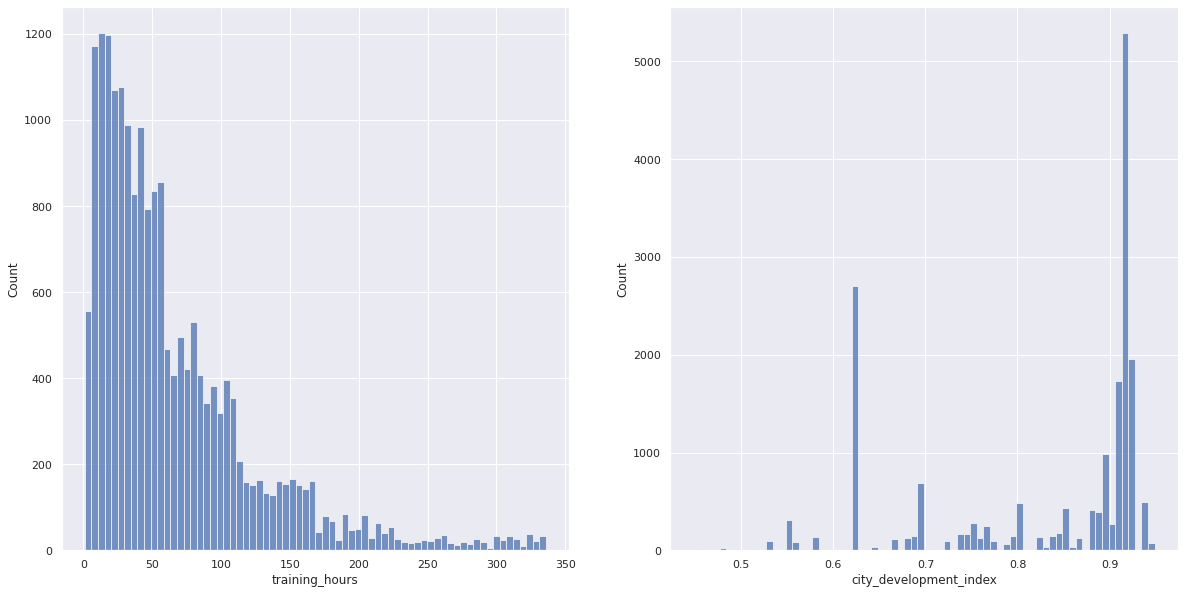

    CATEGORICAL FEATURES:      

-------------city------------- 

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_111       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64


------------gender------------ 

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64


-----relevent_experience------ 

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


-----enrolled_university------ 

no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64


-------major_discipline------- 

STEM               14492
NaN                 2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


---------compa

In [13]:
describe_hr(df_hr, hr_column_types)

#### 2. (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [14]:
print(f"Исходный размер датасета hr {df_hr.shape[0]}")

Исходный размер датасета hr 19158


In [15]:
X_hr_dropna = df_hr.dropna(axis=0)

In [16]:
print(f"Pазмер датасета hr без NaN {X_hr_dropna.shape[0]}")

Pазмер датасета hr без NaN 8955


_Ваш ответ_

посмотрим изменения распределений

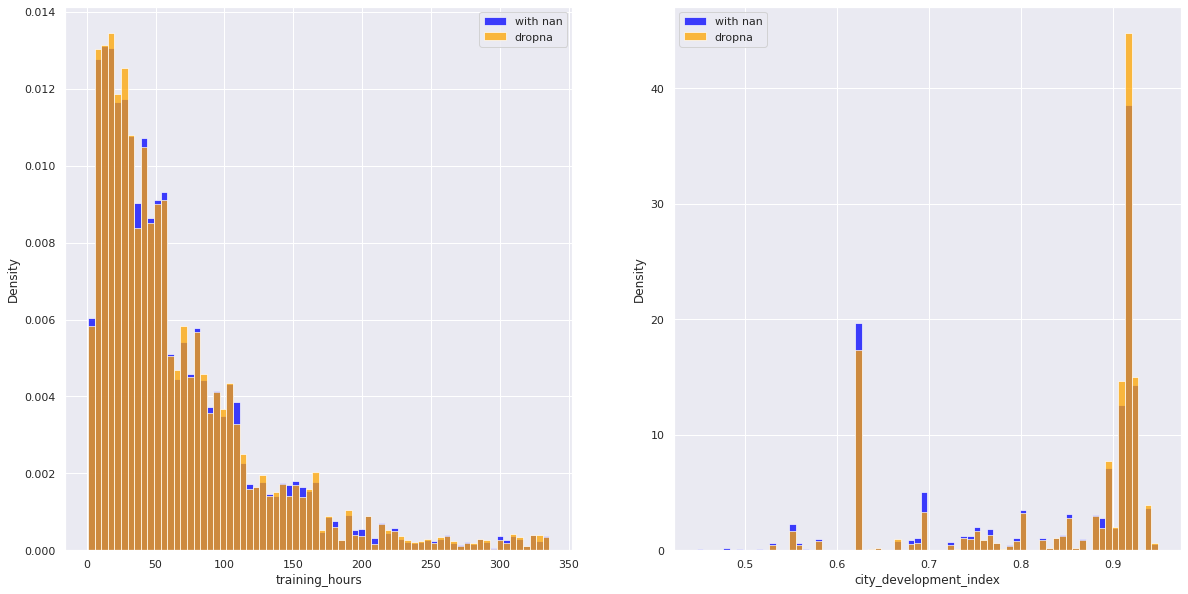

In [57]:
f, axes = plt.subplots(1, 2)
axes = iter(axes)
for col in hr_column_types["numerical"]:
    ax = ax = axes.__next__()
    sns.histplot(
        df_hr[col], ax=ax, bins=70, label="with nan", stat="density", color="blue"
    )
    sns.histplot(
        X_hr_dropna[col],
        ax=ax,
        bins=70,
        label="dropna",
        stat="density",
        color="orange",
    )
    ax.legend()
plt.show()

In [19]:
center_n = 30

for col_type in ["categorical", "ordinal"]:
    print(f"{col_type.upper()} FEATURES:".center(center_n), "\n")
    for col in hr_column_types[col_type]:
        print(col.center(center_n, "-"), "\n")
        print(
            df_hr[col].value_counts(dropna=True, normalize=True)
            - X_hr_dropna[col].value_counts(dropna=True, normalize=True)
        )
        print("\n")

    CATEGORICAL FEATURES:      

-------------city------------- 

city_1     -0.000095
city_10    -0.001318
city_100    0.005197
city_101    0.001235
city_102    0.001798
              ...   
city_93     0.000240
city_94     0.000240
city_97    -0.000155
city_98    -0.000455
city_99    -0.000342
Name: city, Length: 123, dtype: float64


------------gender------------ 

Male      0.000950
Female   -0.005277
Other     0.004327
Name: gender, dtype: float64


-----relevent_experience------ 

Has relevent experience   -0.156809
No relevent experience     0.156809
Name: relevent_experience, dtype: float64


-----enrolled_university------ 

no_enrollment      -0.111975
Full time course    0.107230
Part time course    0.004745
Name: enrolled_university, dtype: float64


-------major_discipline------- 

STEM              -0.005495
Humanities        -0.001281
Other              0.003544
Business Degree    0.001022
Arts               0.001073
No Major           0.001136
Name: major_discipline, dt

Давайте попробуем избежать сокращения размера датасета.

#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

In [20]:
# посмотрим наны в числовых призаках
df_hr[hr_column_types["numerical"]].isna().sum()

training_hours            0
city_development_index    0
dtype: int64

нет пропусков в числовых данных

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

_Ваш ответ_

Можно заполнить умнее, тк некоторые признаки связаны: например рабочий опыт и последняя смена работы. Можно использовать что-то типа KNNImputer.

In [21]:
# посмотрим кличество nan
df_hr[hr_column_types["categorical"]].isnull().sum()

city                      0
gender                 4508
relevent_experience       0
enrolled_university     386
major_discipline       2813
company_type           6140
dtype: int64

In [22]:
# посмотрим кличество nan
df_hr[hr_column_types["ordinal"]].isnull().sum()

education_level     460
experience           65
company_size       5938
last_new_job        423
dtype: int64

создадим отдельную категори для Nan из признаков с большим количеством Nan, возможно пропуск несет в себе дополнительную информацию, к тому же заполнение самой частйо категорией может принести противоречие в данных. при построении модели стоило бы попробоать разные стратегии заполнения, к тому же некоторые умеют работать с nan

In [25]:
def fill_na(X, y):
    X_fill = X.copy()
    for col in ["gender", "company_size", "major_discipline", "company_type"]:
        X_fill[col].fillna(value="NONE", inplace=True)
    for col in ["enrolled_university", "experience", "last_new_job", "education_level"]:
        X_fill[col].fillna(value=X_fill[col].mode()[0], inplace=True)
    return X_fill, y

In [26]:
X_hr_fill, y_hr_fill = fill_na(df_hr, y_hr)

In [27]:
X_hr_fill

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NONE,NONE,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,NONE,No relevent experience,Full time course,Graduate,STEM,5,NONE,NONE,never,83
3,33241,city_115,0.789,NONE,No relevent experience,no_enrollment,Graduate,Business Degree,<1,NONE,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NONE,NONE,1,42
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NONE,NONE,4,52
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NONE,<1,500-999,Pvt Ltd,2,97


#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

Для numerial ничего не изменилось. 

для ["gender", "company_size", "major_discipline", "company_type"] появилась колонка None

In [28]:
for col in ["gender", "company_size", "major_discipline", "company_type"]:
    print(col.center(center_n, "-"), "\n")
    print(X_hr_fill[col].value_counts(dropna=False))
    print("\n")

------------gender------------ 

Male      13221
NONE       4508
Female     1238
Other       191
Name: gender, dtype: int64


---------company_size--------- 

NONE         5938
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64


-------major_discipline------- 

STEM               14492
NONE                2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


---------company_type--------- 

Pvt Ltd                9817
NONE                   6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64




для ["enrolled_university", "experience", "last_new_job", "education_level"] частота самого частого значения несколько увеличилась

In [29]:
for col in ["enrolled_university", "experience", "last_new_job", "education_level"]:

    print(col.center(center_n, "-"), "\n")
    print(
        X_hr_fill[col].value_counts(dropna=True, normalize=True)
        - df_hr[col].value_counts(dropna=True, normalize=True)
    )
    print("\n")

-----enrolled_university------ 

no_enrollment       0.005318
Full time course   -0.004032
Part time course   -0.001286
Name: enrolled_university, dtype: float64


----------experience---------- 

>20    0.002809
5     -0.000254
4     -0.000249
3     -0.000241
6     -0.000216
2     -0.000200
7     -0.000183
10    -0.000175
9     -0.000174
8     -0.000143
15    -0.000122
11    -0.000118
14    -0.000104
1     -0.000098
<1    -0.000093
16    -0.000090
12    -0.000088
13    -0.000071
17    -0.000061
19    -0.000054
18    -0.000050
20    -0.000026
Name: experience, dtype: float64


---------last_new_job--------- 

1        0.012604
>4      -0.003877
2       -0.003418
never   -0.002890
4       -0.001213
3       -0.001207
Name: last_new_job, dtype: float64


-------education_level-------- 

Graduate          0.009117
Masters          -0.005600
High School      -0.002590
Phd              -0.000532
Primary School   -0.000396
Name: education_level, dtype: float64




_Ваш ответ_

### Задание 3  (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [30]:
df_covid = pd.read_csv(COVID_DATA_PATH)

In [31]:
df_covid.country.value_counts()[df_covid.country.value_counts() == 46]

Bahrain    46
Name: country, dtype: int64

Это Бахрейн!

In [32]:
df_covid_bah = df_covid[df_covid.country == "Bahrain"]
df_covid_bah.index = pd.to_datetime(df_covid_bah.date)

<AxesSubplot:xlabel='date', ylabel='total_vaccinations'>

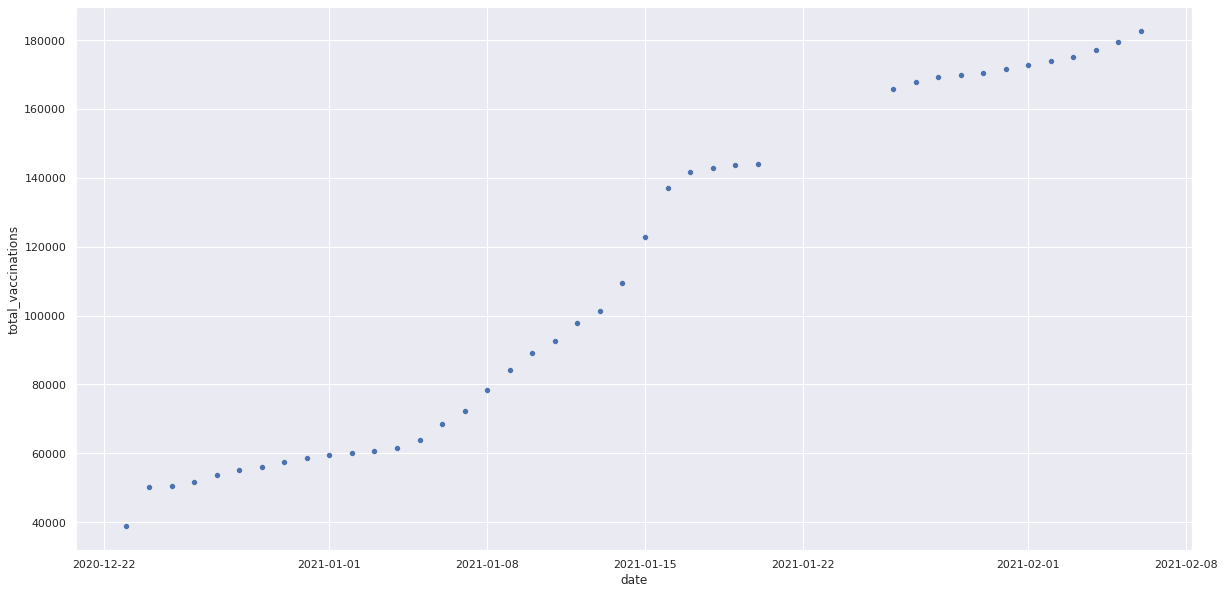

In [33]:
sns.scatterplot(data=df_covid_bah, x=df_covid_bah.index, y="total_vaccinations")

На графике не видно резких ступенек, логично предположить, что увеличение вакцинированного населения шло "плавно". Поэтму использую интерполяцию, полиномиальная выглядит лучше линейной.

Еще 16 января 2021 был национальный день бахрейна. Еще в то же число вышла новость о задержке постако первой дозы вакцины pfizer https://www.reuters.com/business/healthcare-pharmaceuticals/pfizer-delays-jan-vaccine-delivery-bahrain-health-ministry-2021-01-16/

In [34]:
df_covid_bah.loc[:, "total_vaccinations"].interpolate(
    "polynomial", order=2, inplace=True
)

/home/stepan/miniconda3/envs/scientific/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='date', ylabel='total_vaccinations'>

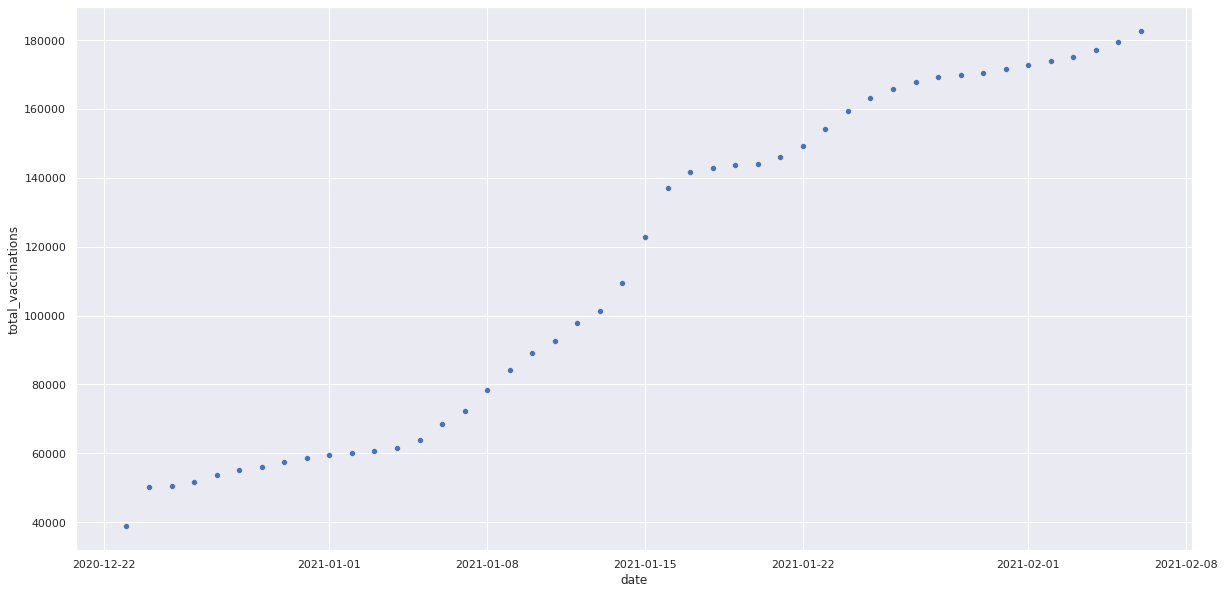

In [35]:
sns.scatterplot(data=df_covid_bah["total_vaccinations"])

_Ваш ответ_

### Задание  4 (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


В датасете всего два числовых признака. В признаке taining_hours выбросов нет, есть длинных хвост распределения. В признаке city_development_index есть несколько маленьких значений, их можно считать выбросами, связаны с тем ,что для некоторых городов есть только одиночные объекты.

_Ваш ответ_

### Задание  5 (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


In [36]:
for col in hr_column_types["ordinal"]:
    print(X_hr_fill[col].value_counts())

Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64
NONE         5938
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64
1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64


In [37]:
hr_ordinal_label_encoding = {
    "company_size": [
        "NONE",
        "<10",
        "10/49",
        "50-99",
        "100-500",
        "500-999",
        "1000-4999",
        "5000-9999",
        "10000+",
    ],
    "experience": ["<1", *list(map(str, range(1, 21))), ">20"],
    "education_level": ["Primary School", "High School", "Graduate", "Masters", "Phd"],
    "last_new_job": ["never", "1", "2", "3", "4", ">4"],
}

In [38]:
def encode(X):
    X_encode = X.copy()
    # one_hot
    one_hot_columns = [
        "gender",
        "relevent_experience",
        "enrolled_university",
        "major_discipline",
        "company_type",
    ]
    for col in one_hot_columns:
        X_encode = X_encode.join(pd.get_dummies(X_encode.pop(col), prefix=col))
    # frequency
    city_freq = X_encode.city.value_counts(normalize=True)
    X_encode["city"] = X_encode.pop("city").map(city_freq)
    # ordinal
    for col, values in hr_ordinal_label_encoding.items():
        map_d = dict(zip(values, range(len(values))))
        X_encode[col] = X_encode.pop(col).map(map_d)
    return X_encode

In [39]:
X_hr_encode = encode(X_hr_fill)

Закодировали one hot не порядковые, индекс города через frequency, ибо их много и, возможно, города откуда мало респондентов - принесет дополнительную информацию. Порядковые закодировали натуральными числами, еще имеет смысл выделить None размера компании и never смены работы в отдельные признаки.

_Ваш ответ_

### Задание  5 (1 балл)
Выполните задание для датасета _hr_.




#### 1.  (1 балл)
Реализуйте функцию undersampling

#### 2.  (1 балл)
Реализуйте функцию oversampling

In [41]:
def undersampling(X, y):
    X_1 = X[y == 1]
    X_0 = X[y == 0]
    size = min(X_1.shape[0], X_0.shape[0])
    X_under = pd.concat(
        [X_1.sample(size, replace=False), X_0.sample(size, replace=False)]
    )
    y_under = np.zeros(size * 2)
    y_under[:size] = 1
    return X_under, y_under


def oversampling(X, y):
    X_1 = X[y == 1]
    X_0 = X[y == 0]
    size = max(X_1.shape[0], X_0.shape[0])
    X_over = pd.concat(
        [
            X_1.sample(size, replace=X_1.shape[0] < size),
            X_0.sample(size, replace=X_0.shape[0] < size),
        ]
    )
    y_over = np.zeros(size * 2)
    y_over[:size] = 1
    # Возвращает данные, сбалансированные методом oversampling
    return X_over, y_over

In [42]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

In [43]:
X_hr_under.shape, y_hr_under.sum() * 2

((9554, 31), 9554.0)

In [44]:
X_hr_over.shape, y_hr_over.sum() * 2

((28762, 31), 28762.0)

#### 3.  (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [45]:
# !pip install -U imbalanced-learn

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
X_hr_SMOTE, y_hr_SMOTE = smote.fit_resample(X_hr_encode, y_hr_fill)

In [52]:
X_hr_SMOTE.shape, y_hr_SMOTE.sum() * 2

((28762, 31), 28762.0)

#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

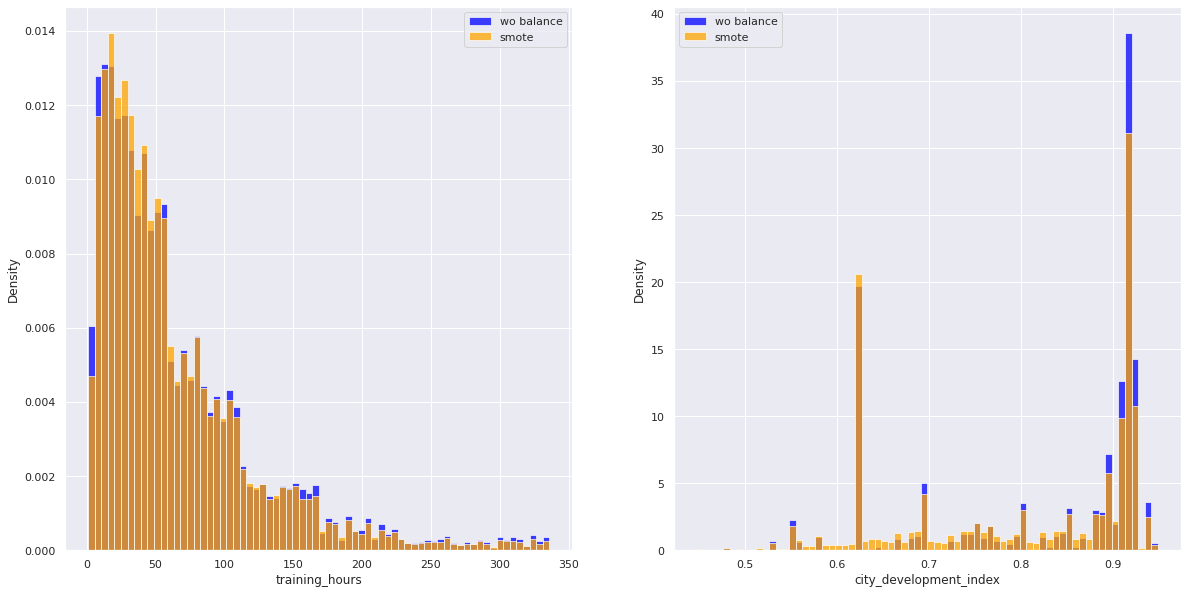

In [59]:
f, axes = plt.subplots(1, 2)
axes = iter(axes)
for col in hr_column_types["numerical"]:
    ax = ax = axes.__next__()
    sns.histplot(
        X_hr_encode[col],
        ax=ax,
        bins=70,
        label="wo balance",
        stat="density",
        color="blue",
    )
    sns.histplot(
        X_hr_SMOTE[col],
        ax=ax,
        bins=70,
        label="smote",
        stat="density",
        color="orange",
    )
    ax.legend()
plt.show()

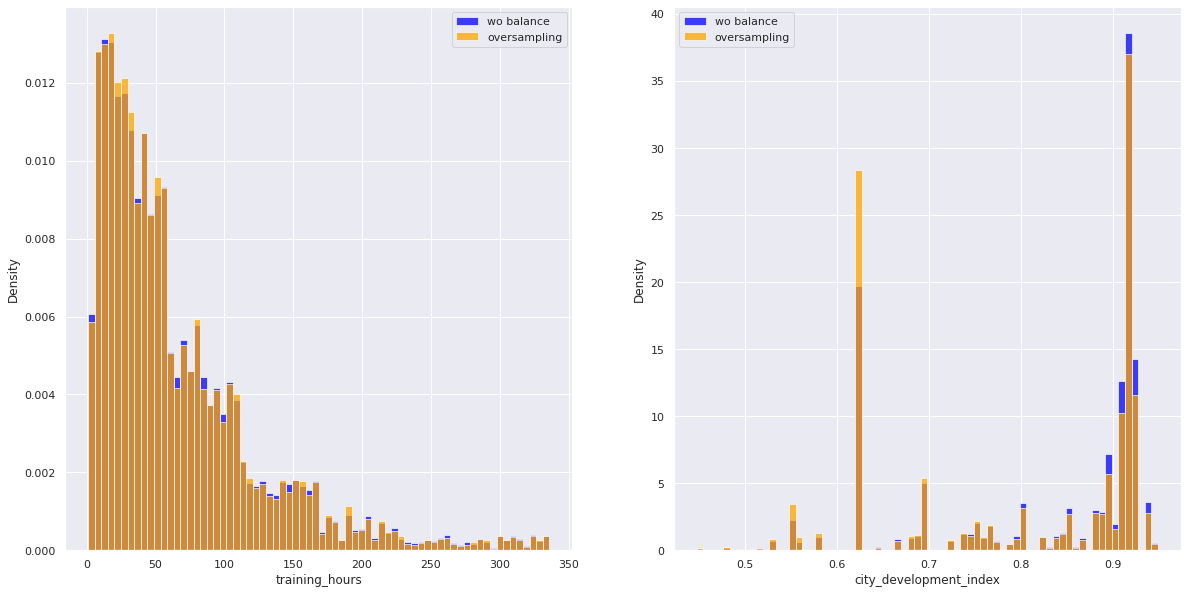

In [60]:
f, axes = plt.subplots(1, 2)
axes = iter(axes)
for col in hr_column_types["numerical"]:
    ax = ax = axes.__next__()
    sns.histplot(
        X_hr_encode[col],
        ax=ax,
        bins=70,
        label="wo balance",
        stat="density",
        color="blue",
    )
    sns.histplot(
        X_hr_over[col],
        ax=ax,
        bins=70,
        label="oversampling",
        stat="density",
        color="orange",
    )
    ax.legend()
plt.show()

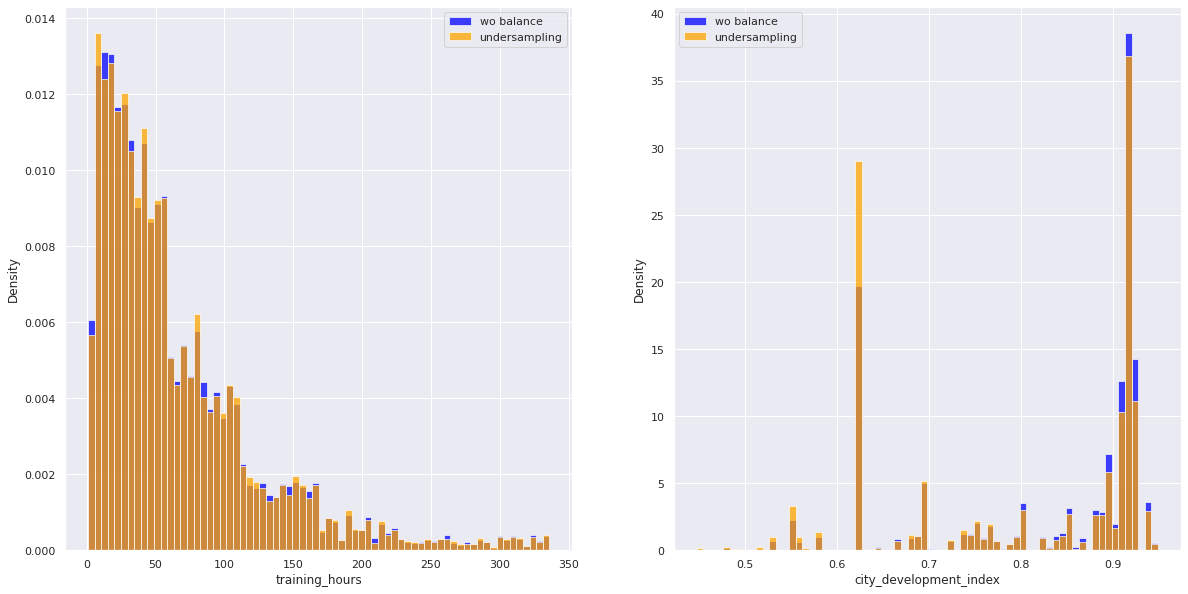

In [61]:
f, axes = plt.subplots(1, 2)
axes = iter(axes)
for col in hr_column_types["numerical"]:
    ax = ax = axes.__next__()
    sns.histplot(
        X_hr_encode[col],
        ax=ax,
        bins=70,
        label="wo balance",
        stat="density",
        color="blue",
    )
    sns.histplot(
        X_hr_under[col],
        ax=ax,
        bins=70,
        label="undersampling",
        stat="density",
        color="orange",
    )
    ax.legend()
plt.show()

_Ваш ответ_

для числовых признаков изминения небольшие:при любом семплировании city_development_index чут ьпоменяло распределение, видимо в классе меньше по объем city_development_index в среднем меньше. Для категоральны признаков смотреть гралами не имеет смысла, только может быть полезным найти признаки, которые чрезмерно изменились.